In [1]:
import numpy as np
import pylab as pl
import pandas as pd
import scipy.stats as st
import scipy.optimize as opt

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Setting the mean and the standard deviation
mymean = 200.0
mystandarddeviation = 5
size = 1000
dist_size = 100

#Generating N = 100 samples from Bionomial Distribution
np.random.seed(10)
binomial_dist = [ 
    st.binom.rvs(n = 200, p =0.5, size = size)
    for i in range(dist_size)
]

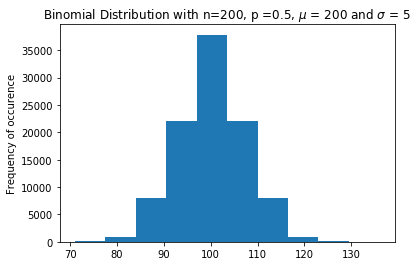

In [3]:
#Flattening the distribution
pl.hist(np.array(binomial_dist).flatten());
plt.title('Binomial Distribution with n=200, p =0.5, $\mu$ = 200 and $\sigma$ = 5')

plt.ylabel('Frequency of occurence')
plt.show()

Figure 1: Poisson distribution of 100 samples of size 1000 with n= 200, p = 0.5, $\mu=200$ and $\sigma=5$.


In [4]:
binomial_dist[4]

array([101, 107,  96,  99,  93,  92, 100, 108, 104,  99,  95, 109,  99,
       103, 106, 105,  99, 107,  95,  92, 104, 100,  97,  95,  94, 107,
        93,  93, 114, 102,  97, 107, 101, 107,  93,  98,  93,  98, 100,
       102,  86, 104, 100, 105, 100,  93,  98,  93, 103, 102, 109, 100,
        98,  95, 100,  88, 116, 103, 102, 109,  91, 107,  86,  92,  91,
       100, 103, 100, 105,  88,  88,  89, 110, 105, 101,  95,  99,  99,
        92,  95,  94, 105,  82, 103,  98, 104,  95,  99,  86, 106, 100,
       108,  89, 104, 101, 104, 100, 111, 103,  82, 111,  92,  97, 102,
       104, 100, 103, 101,  95, 102, 106,  92, 103,  98, 112,  95,  97,
       100,  91,  94, 105,  97,  93,  95,  93, 101, 102,  85,  92,  91,
        99, 111,  99,  91, 105,  92, 101, 101, 112, 100, 101,  97,  99,
        90,  95, 108, 104, 104,  98, 108, 102, 105,  88,  99, 109,  97,
        90, 111, 100, 107,  96,  87, 105, 112,  96,  95, 104,  89,  96,
       100,  88, 104, 101, 107, 104,  97,  92,  99, 102, 103,  9

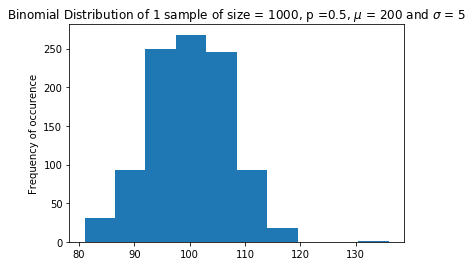

In [5]:
pl.hist(binomial_dist[4]);
plt.title('Binomial Distribution of 1 sample of size = 1000, p =0.5, $\mu$ = 200 and $\sigma$ = 5')

plt.ylabel('Frequency of occurence')

Figure 2: Poisson distribution of 1 samples of size 1000 with p = 0.5, $\mu=200$ and $\sigma=5$.

In [6]:
#Function calculaing z score
def calculate_z(binom, mu = mymean, std = mystandarddeviation):
    z = np.sqrt(len(binom))*(mu - binom.mean())/(std)
    return z

In [7]:
len(binomial_dist)

100

In [8]:
#calculating z score for each sample
zstatistic = [calculate_z(i)for i in binomial_dist]
   

In [9]:
len(zstatistic)

100

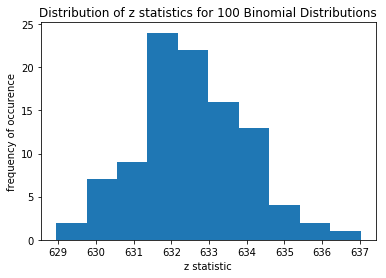

In [10]:
pl.hist(zstatistic)
plt.title('Distribution of z statistics for 100 Binomial Distributions')
plt.xlabel('z statistic')
plt.ylabel('frequency of occurence')
plt.show()

Figure 3: The distribution of z statistics from 100 Binomial distributions of size 1000 with $\mu=200$ and $\sigma=5$.

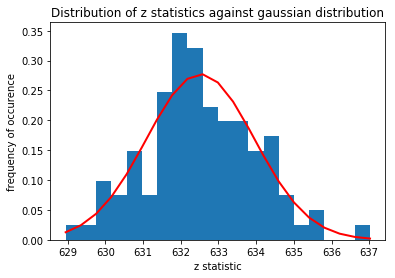

In [11]:
#fit the z-statistics with a gaussian model 
(mean, sigma) = st.norm.fit(zstatistic)
binvalue, bins, patches = pl.hist(zstatistic,20, normed=True)

pl.plot(bins, mlab.normpdf(bins, mean, sigma),  'r', linewidth=2);
plt.title('Distribution of z statistics against gaussian distribution')
plt.xlabel('z statistic')
plt.ylabel('frequency of occurence')


Figure 4: The distribution of z scores from 1000 Binomial distributions of size 1000, against gaussian distribution.

In [12]:
#null hypothesis - that this is a gaussian distribution
st.anderson(zstatistic, 'norm')

AndersonResult(statistic=0.21579511073697688, critical_values=array([ 0.555,  0.632,  0.759,  0.885,  1.053]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))

Here, since the statistic of 0.216 is less than the critical value of 0.885 at siginificance level of 2.5%, null hypothesis that this is a gaussian distribution cannot be rejected.